# Layer Explaination

In [1]:
import tensorflow as tf

## Input Image  
Input으로 들어갈 DataSet을 들여다보면서 시각화까지

패키지 로드  
- os
- glob
- matplotlib

In [2]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [4]:
(train_x, train_y), (test_x,test_y)= datasets.mnist.load_data()

이미지를 열어봤으니 무엇을 확인 해볼까요?

In [5]:
# 이미지 shape 확인
image = train_x[0]
image.shape

(28, 28)

차원 수를 확인 했는데 어떤 결과가 나왔나요? 
- [batch size, height, width, channel]

<function matplotlib.pyplot.show(close=None, block=None)>

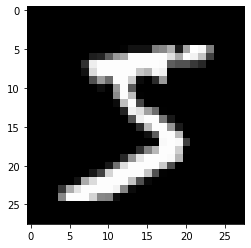

In [6]:
plt.imshow(image,'gray')
plt.show

In [7]:
# 차원 수 높이기 
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

# Feature Extraction
    - Feature Extraction : Feature를 뽑아내는 과정
    - Calssification     : 예측을 하는곳

## Convolution

- filters     : layer에서 나갈 때 몇 개의 filter를 만들 것인지 (a.k.a weights, filters,channels)
- kernel_size : filter(Weight)의 사이즈  
- strides     : 몇 개의 pixel을 skip 하면서 훑어지나갈 것인지 (사이즈에도 영향을 줌)  
- padding     : zero padding을 만들 것인지. VALID는 Padding이 없고, SAME은 Padding이 있음 (사이즈에도 영향을 줌)  
- activation  : Activation Function을 만들것인지. 당장 설정 안해도 Layer층을 따로 만들 수 있음

In [8]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1),padding='SAME', activation ='relu')

(3, 3) 대신에 3으로도 대체 가능

### Visualization

- tf.keras.layers.Conv2D

In [9]:
# float32로 형변환
image = tf.cast(image, dtype=tf.float32)
image.dtype

tf.float32

In [10]:
# 레이어 생성
layer = tf.keras.layers.Conv2D(filters=5, kernel_size=(3,3), strides=(1,1),padding='SAME')
layer

In [11]:
# layer하기 위해서는 image.shape이 [batch size, height, width, channel] 구조여야함
# layer filters가 바뀌면 channel이 변경

output = layer(image)

In [12]:
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [13]:
# 컨벌루션을 거치면서 변경됨
np.min(output), np.max(output)

(-257.92917, 251.7848)

In [37]:
image.shape

TensorShape([1, 28, 28, 1])

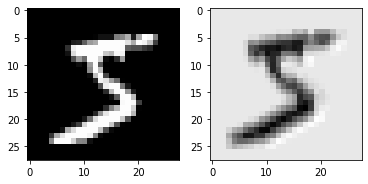

In [14]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')

plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0],'gray')

plt.show()


weight 불러오기

- layer.get_weights()

In [20]:
# weight를 받으면 리스트 형태
# weight.shape이 안됨
weight = layer.get_weights()
weight

[array([[[[ 0.08674183, -0.18656628, -0.30079755,  0.00749326,
            0.00086403]],
 
         [[ 0.00306121,  0.18377987,  0.2606869 , -0.02796736,
           -0.13447301]],
 
         [[-0.19695958,  0.03213772, -0.13940439, -0.14634983,
            0.29342142]]],
 
 
        [[[-0.02208534, -0.04721293,  0.18181714, -0.31475395,
            0.18770936]],
 
         [[-0.10007231, -0.3217822 ,  0.2892739 , -0.10080743,
            0.11227265]],
 
         [[-0.17554903, -0.0380106 , -0.186061  , -0.10231321,
            0.02562928]]],
 
 
        [[[-0.08167624,  0.11497679,  0.2967306 , -0.18403427,
            0.26065287]],
 
         [[ 0.09454814,  0.32376972,  0.24057278, -0.22897777,
            0.03366852]],
 
         [[-0.32812715,  0.19635335, -0.13153863,  0.28849354,
            0.17167416]]]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [21]:
# len으로 확인
len(weight)

2

In [23]:
# weight의 모형
print(weight[0].shape)

# weight의 바이어스
print(weight[1].shape)

(3, 3, 1, 5)
(5,)


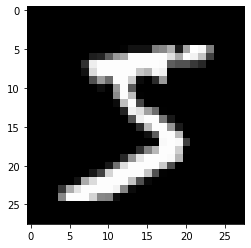

In [36]:
plt.imshow(image[0,:,:,0],'gray')
plt.show()

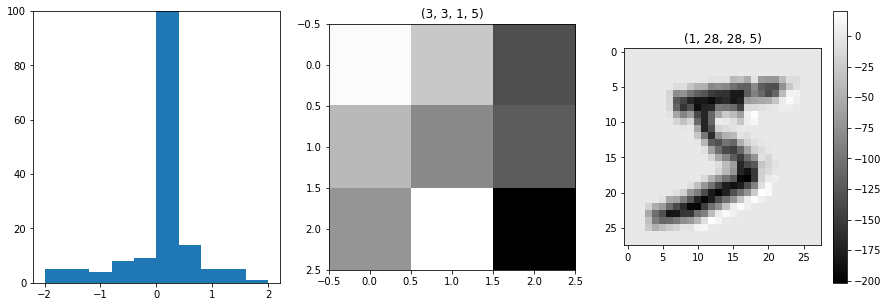

In [39]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(output.numpy().ravel(), range=[-2,2]) # 
plt.ylim(0,100)

# 필터를 보여줌 (weight)
plt.subplot(1,3,2)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0],'gray') # weight[0]의 첫번째와 두번째 컬럼값만 사용

# 위의 이미지가 필터를 걸쳐 다음과 같이 변환
plt.subplot(1,3,3)
plt.title(output.shape)
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

## Activation Function
- 0미만의 값을 다 0으로 바꿔준다.

In [53]:
np.min(output)

-257.92917

In [56]:
# 0 미만의 값을 다 0으로 바꾼다.
tf.keras.layers.ReLU()

In [59]:
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

In [61]:
# 기존 output shape은 유지
act_output.shape

TensorShape([1, 28, 28, 5])

In [63]:
np.min(act_output)

0.0

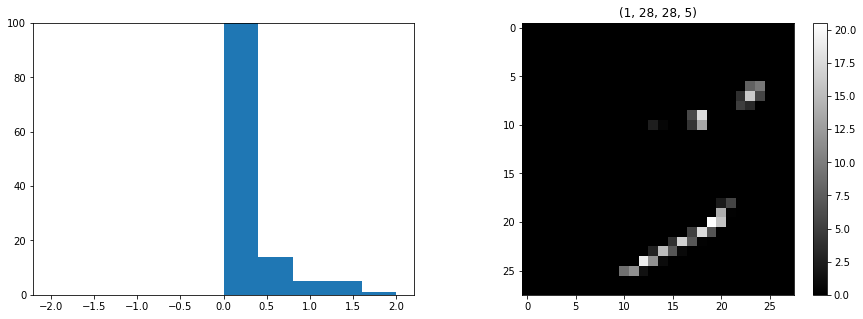

In [69]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(act_output.numpy().ravel(), range=[-2,2])  #.ravel() 하나의 리스트로 나열
plt.ylim(0,100)

plt.subplot(1,2,2)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

## Pooling

- tf.keras.layers.MaxPool2D

In [73]:
# 풀링은 주로 strides = (2,2)
tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2), padding = 'SAME')

In [74]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2), padding = 'SAME')
pool_output = pool_layer(act_output)

In [76]:
print(act_output.shape)

# 풀링하면 반으로 줄어든것을 확인
# pool_size에서 가장 큰값이 이동
print(pool_output.shape)

(1, 28, 28, 5)
(1, 14, 14, 5)


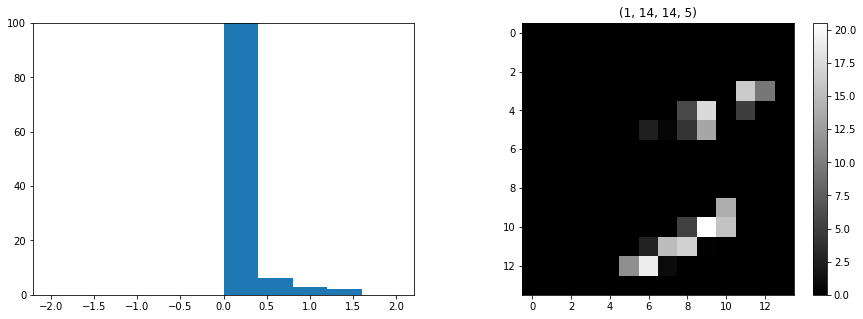

In [79]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(pool_output.numpy().ravel(), range=[-2,2]) #.ravel() 하나의 리스트로 나열
plt.ylim(0,100)

plt.subplot(1,2,2)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

# Fully Connected

<img src="dataset/image/Fully Connected.png" width="640" height="400">

In [ ]:
 # y 뉴런 (초록), b는 바이어스 (검은)
 # w 가충치 (선), X 입력값 (빨간)
 y = wX + b

## Flatten

<img src="dataset/image/Flatten.png" width="640" height="400">
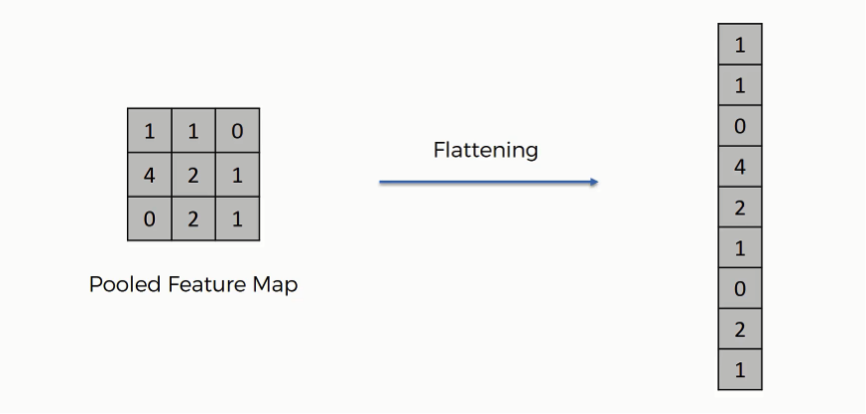

- tf.keras.layers.Flatten()

In [82]:
# 사이즈는 유지하면서 하나의 컬럼으로 출력
tf.keras.layers.Flatten()

In [85]:
Fla_layer = tf.keras.layers.Flatten()
flatten = Fla_layer(output)

In [87]:
output.shape

TensorShape([1, 28, 28, 5])

In [86]:
# 1은 배치사이즈
flatten.shape

TensorShape([1, 3920])

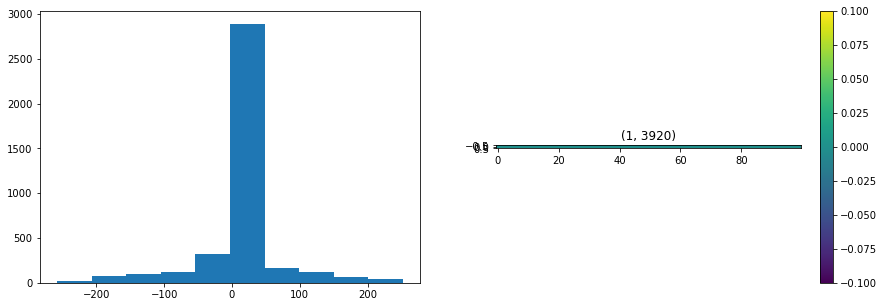

In [89]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(flatten.numpy().ravel()) #.ravel() 하나의 리스트로 나열

plt.subplot(1,2,2)
plt.title(flatten.shape)
plt.imshow(flatten[:,:100])
plt.colorbar()
plt.show()

## Dense
- 하나씩 다 연결하겠다는 의미

- tf.keras.layers.Dense

In [90]:
# (숫자,)  노드의 갯수
tf.keras.layers.Dense(32, activation='relu')

In [91]:
De_layer = tf.keras.layers.Dense(32, activation='relu')
Dense = De_layer(flatten)

In [92]:
Dense.shape

TensorShape([1, 32])

In [94]:
De_layer_64 = tf.keras.layers.Dense(64, activation='relu')
Dense_64 = De_layer_64(Dense)

In [95]:
Dense_64.shape

TensorShape([1, 64])

## DropOut
- 학습할때마다 학습이 안되는 값들을 끊으면서 학습이 되게끔

- tf.keras.layers.Dropout

In [96]:
# 얼마나 살릴껀지에 대한 비율 입력

Dr_layer = tf.keras.layers.Dropout(0.7)
Dropout = Dr_layer(output)

In [98]:
# 데이터를 없애는것이 아님 학습할때만 연결을 끊음
Dropout.shape

TensorShape([1, 28, 28, 5])

# Build Model

<img src="dataset/image/Build Model.png" width="800" height="400">
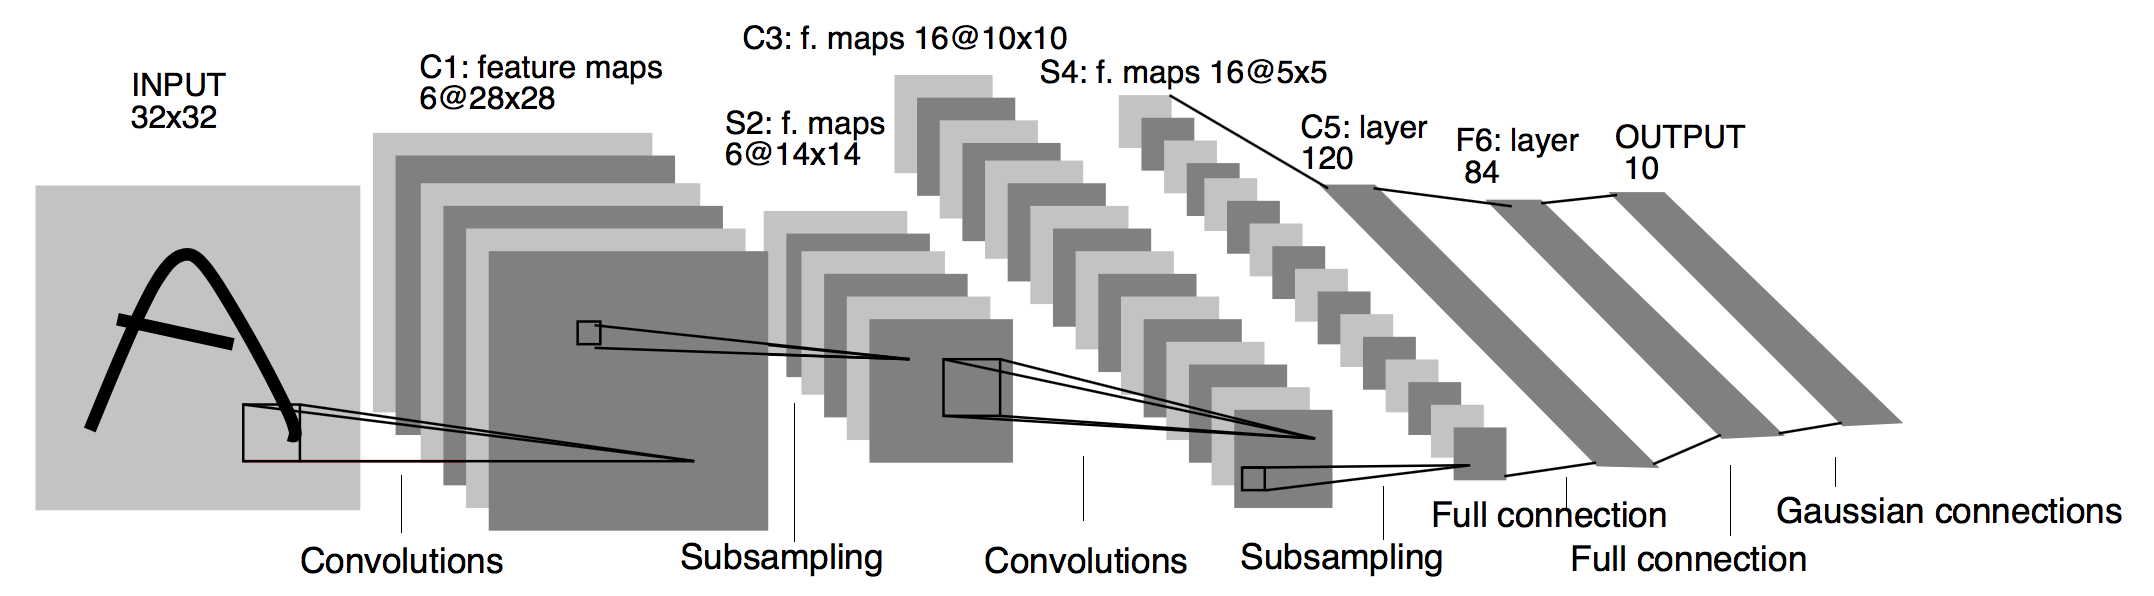

In [99]:
# 효율적으로 사용하기 위해
from tensorflow.keras import layers

In [100]:
# 모델을 설계하기 위해서는 input으로 들어가는 shape를 알아야함
# 그 데이터에 대한 class 갯수 지정

input_shape = (28,28,1)
num_classes = 10

In [111]:
inputs = layers.Input(input_shape)

# net을 계층을 거쳐 학습
# Feature Extraction
# 1번째 Convolution Block
net     = layers.Conv2D(32, 3, padding='SAME')(inputs)
net     = layers.Activation('relu')(net)
net     = layers.Conv2D(32, 3, padding='SAME')(net)
net     = layers.Activation('relu')(net)
# Pooling
net     = layers.MaxPool2D((2,2))(net)
# DropOut
net     = layers.Dropout(0.25)(net)

# 2번째 Convolution Block
net     = layers.Conv2D(64, 3, padding='SAME')(net)
net     = layers.Activation('relu')(net)
net     = layers.Conv2D(64, 3, padding='SAME')(net)
net     = layers.Activation('relu')(net)
# Pooling
net     = layers.MaxPool2D((2,2))(net)
# DropOut
net     = layers.Dropout(0.25)(net)


# Fully Connected
net     = layers.Flatten()(net)
net     = layers.Dense(512)(net)
net     = layers.Activation('relu')(net)
net     = layers.Dropout(0.25)(net)
net     = layers.Dense(num_classes)(net)             # 마지막은 클래스 갯수만큼 노드를 지정
net     = layers.Activation('softmax')(net)     # 결과값을 모두 더하면 1이 되도록 하는 것 softmax

model   = tf.keras.Model(inputs = inputs, outputs=net, name = 'Basic_CNN')

In [112]:
model

## Summary

In [113]:
# 각 레이어층의 정보를 알려줌
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
activation_23 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_24 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 32)        0 